In [1]:
# Imports
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Helper functions
def cache_file(url):
    """Download url and cache file locally for future use"""
    fname = url.split('/')[-1]
    if os.path.isfile(fname) is False:
        req = requests.get(url)
        # Write raw content in binary format
        with open(fname, 'wb') as f:
            f.write(req.content)
    return fname

In [2]:
# Download data and construct a DataFrame
url = 'https://iot.fvh.fi/opendata/uiras/uiras-all-data.csv.gz'
fname = cache_file(url)  # Delete file from local directory, if you want to use fresh data
cols = ['readable_time', 'batt', 'lat', 'lon', 'rssi', 'temp_in', 
        'temp_out1', 'temp_out2', 'temprh_rh', 'temprh_temp', 'dev-id']
df = pd.read_csv(fname, compression='gzip', parse_dates=['readable_time'], usecols=cols, index_col='readable_time')
df.index = df.index.rename('time') 
df.tail()

batt  lat  lon  rssi  temp_in  temp_out1  \
time                                                                          
2020-07-10 09:48:47.565000+00:00  5.275  NaN  NaN  -103    18.57      19.12   
2020-07-10 09:54:58.635000+00:00  5.313  NaN  NaN   -87    17.71      18.43   
2020-07-10 09:55:48.936000+00:00  5.280  NaN  NaN  -112    22.26      14.93   
2020-07-10 10:01:01.897000+00:00  5.344  NaN  NaN   -97    25.16      16.06   
2020-07-10 10:01:14.536000+00:00  5.269  NaN  NaN   -88    10.69      18.25   

                                  temp_out2  temprh_rh  temprh_temp  \
time                                                                  
2020-07-10 09:48:47.565000+00:00        NaN        NaN          NaN   
2020-07-10 09:54:58.635000+00:00        NaN        NaN          NaN   
2020-07-10 09:55:48.936000+00:00        NaN        NaN          NaN   
2020-07-10 10:01:01.897000+00:00        NaN        NaN          NaN   
2020-07-10 10:01:14.536000+00:00        NaN        NaN          NaN   

                                            dev-id  
time                                                
2020-07-10 09:48:47.565000+00:00  70B3D57050004C07  
2020-07-10 09:54:58.635000+00:00  70B3D57050004FB9  
2020-07-10 09:55:48.936000+00:00  70B3D57050004FE6  
2020-07-10 10:01:01.897000+00:00  70B3D57050005054  
2020-07-10 10:01:14.536000+00:00  70B3D57050004DF8

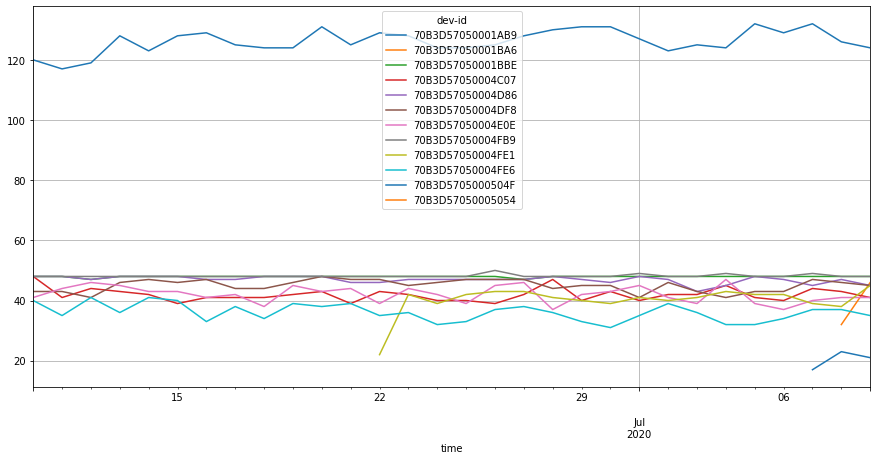

In [3]:
# Visualise packets per day. In optimal case there should be 48 
# (because sending interval should be 30 minutes)
# but there is always some packet loss

from datetime import datetime, timedelta
import pytz
today = datetime.now().astimezone(pytz.UTC).replace(hour=0, minute=0, second=0, microsecond=0)
start_time =  today - timedelta(days=30)
df_last_week = df[(df.index >= start_time) & (df.index < today)]

daily_measurements = df_last_week.groupby('dev-id').resample('24H')['dev-id'].count().unstack('dev-id')
axes = daily_measurements.plot(figsize=(15,7), grid=True)

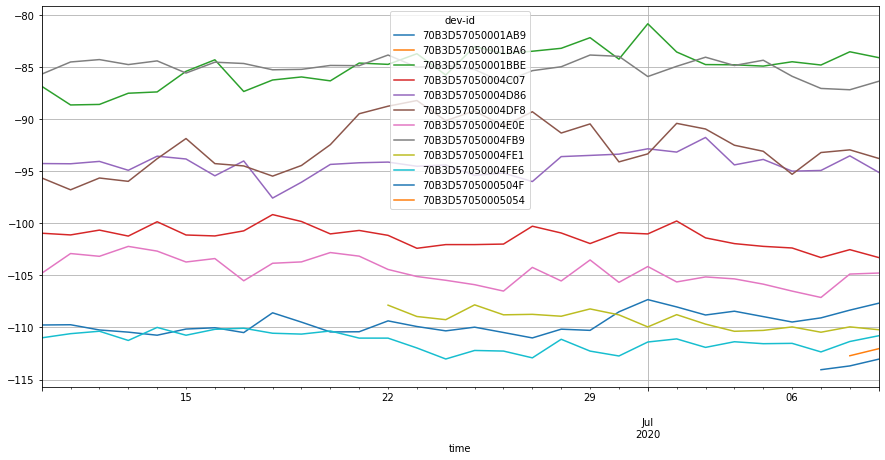

In [4]:
daily_rssi = df_last_week.groupby('dev-id').resample('24H')['rssi'].mean().unstack('dev-id')
axes = daily_rssi.plot(figsize=(15,7), grid=True)

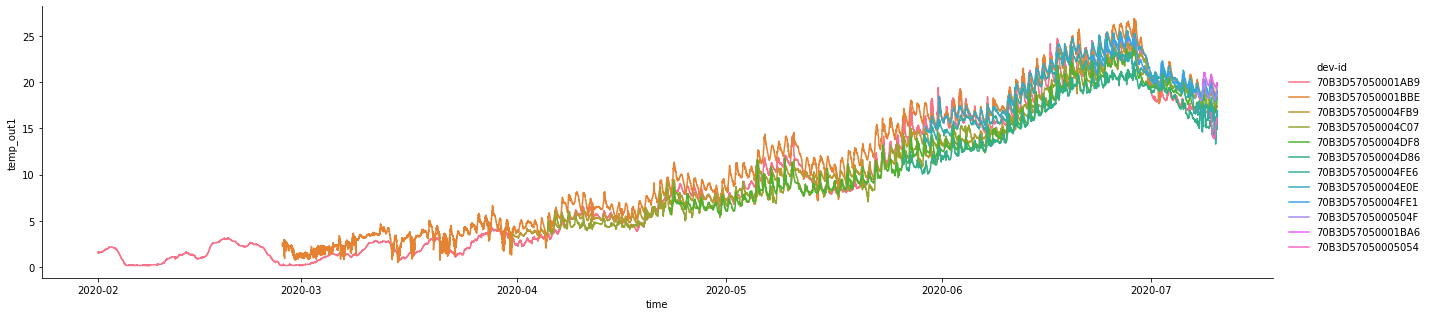

In [5]:
dfs = df.reset_index()
dfs
sns.relplot(x="time", y="temp_out1", 
            hue="dev-id",
            height=4.5, aspect=4,
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dfs);